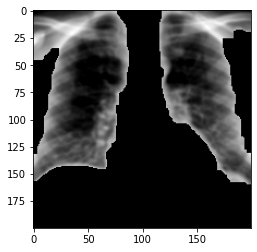

In [1]:
from skimage.io import imread
from matplotlib import pyplot as plt

root_dir = 'preprocessed/'
img_dir = 'masked_images/'
mask_dir = 'masks/'

idx = 100

features = {
    'area': [],
    'perimeter': [],
    'eccentricity': [],
    'major axis': [],
    'minor axis': [],
    'contrast': [],
    'homogeneity': [],
    'energy': [],
    'correlation': [],
    'entropy': [],
    'mean': [],
    'variance': [],
    'skewness': [],
    'uniformity': [],
}

img_loc = f'{root_dir}{img_dir}{idx}.png'
mask_loc = f'{root_dir}{mask_dir}{idx}.png'

img = imread(img_loc, as_gray=True)
mask = imread(mask_loc, as_gray=True)

plt.imshow(img, cmap=plt.cm.gray)

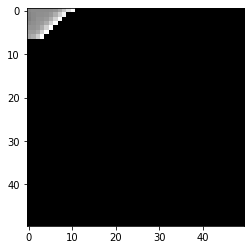

In [22]:
chunk_width = chunk_height = img.shape[0]//4

i, j = 3, 0

chunk = img[ chunk_width * i:chunk_width * (i+1), chunk_height * j:chunk_height * (j+1) ]
plt.imshow(chunk, cmap=plt.cm.gray)

In [2]:
# shape based features
from skimage.measure import regionprops

prop = regionprops(mask)[0]

features['area'].append( prop['area'] )
features['perimeter'].append( prop['perimeter'] )
features['eccentricity'].append( prop['eccentricity'] )
features['major axis'].append( prop['major_axis_length'] )
features['minor axis'].append( prop['minor_axis_length'] )

features

{'area': [13459],
 'perimeter': [769.4041122946064],
 'eccentricity': [0.7793482156580447],
 'major axis': [209.68541764894454],
 'minor axis': [131.38700849247212],
 'contrast': [],
 'homogeneity': [],
 'energy': [],
 'correlation': [],
 'entropy': [],
 'mean': [],
 'variance': [],
 'skewness': [],
 'uniformity': []}

In [3]:
# glcm texture based features
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte

glcm = greycomatrix(img_as_ubyte(img), [1], [0], symmetric=True)

features['contrast'].append( greycoprops(glcm, prop='contrast')[0][0] )
features['homogeneity'].append( greycoprops(glcm, prop='homogeneity')[0][0] )
features['energy'].append( greycoprops(glcm, prop='energy')[0][0] )
features['correlation'].append( greycoprops(glcm, prop='correlation')[0][0] )

features

{'area': [13459],
 'perimeter': [769.4041122946064],
 'eccentricity': [0.7793482156580447],
 'major axis': [209.68541764894454],
 'minor axis': [131.38700849247212],
 'contrast': [204.72175879396985],
 'homogeneity': [0.7530291602790189],
 'energy': [0.6552930483803215],
 'correlation': [0.9344120061569131],
 'entropy': [],
 'mean': [],
 'variance': [],
 'skewness': [],
 'uniformity': []}

In [4]:
#other texture based features
import numpy as np
from skimage.measure import shannon_entropy
from skimage.measure import moments, moments_central
from scipy.stats import skew

# entropy
features['entropy'].append( shannon_entropy(img) )

# skewness, total mean, variance
arr = img[img != 0] #remove zeroes (masked out pixels) from image
features['mean'].append( np.mean(arr) )
features['variance'].append( np.var(arr) )
features['skewness'].append( skew(arr) )

In [5]:
# Source: https://stackoverflow.com/questions/30851024/matlab-how-to-calculate-uniformity-of-an-image?rq=1
# Uniformity

def uniformity(img):
    intensity_lvls = np.unique(img) # Get all intensity levels
    numel = intensity_lvls.size # Number of intensity levels
    return numel
img = img[img != 0]
features['uniformity'].append( uniformity(img) )

In [16]:
import pandas as pd

metadata_df = pd.read_csv('final_dataset.csv')

df = pd.DataFrame.from_dict(features)

df['finding'] = metadata_df['finding']

df

,area,perimeter,eccentricity,major axis,minor axis,contrast,homogeneity,energy,correlation,entropy,mean,variance,skewness,uniformity,finding
0,13459,769.404112,0.779348,209.685418,131.387008,204.721759,0.753029,0.655293,0.934412,3.155457,76.84828,706.521152,0.291785,115,COVID-19


In [10]:
#Source: https://github.com/scipy/scipy/issues/9097
def signaltonoise(a, axis=0, ddof=0):
    #a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

signaltonoise(img, axis=None)

706.521152216443

In [8]:
#ayaw ni pansina kay experiment ra naku ni

import math
#excluding zero as it is not included in roi

signal = np.mean(img)
noise = np.std(img)
SNR = 10 * math.log(signal/noise, 10)

print(signal)
print(noise)
print(SNR)
print(signal/noise)

76.84827996136414
26.580465613236406
4.6107156718757345
2.8911562754226408
